In [1]:
import os
import numpy as np

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Clustering



In [2]:
from sklearn.datasets import load_iris

data = load_iris()
x = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


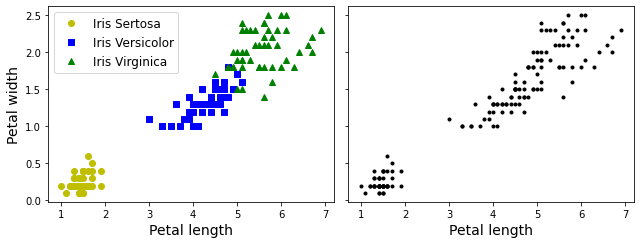

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3.5))

plt.subplot(121) 
plt.plot(x[y==0,2], x[y==0,3], "yo", label="Iris Sertosa")
plt.plot(x[y==1,2], x[y==1,3], "bs", label="Iris Versicolor")
plt.plot(x[y==2,2], x[y==2,3], "g^", label="Iris Virginica")
plt.xlabel("Petal length",fontsize=14)
plt.ylabel("Petal width",fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(x[:,2], x[:,3], c="k", marker=".")
plt.xlabel("Petal length",fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

Above, on left hand side is labeled dataset,for which classification
algorithm like logistic regression, random forest works but on the right hand side is the same dataset without labels, where clustering algorithm is needed and classification algorithm does not work.

## K-Means


In [4]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [5]:
x,y = make_blobs(n_samples=2000, centers=blob_centers,
                cluster_std=blob_std, random_state=7)

In [6]:
def plot_clusters(x, y=None):
    plt.scatter(x[:,0], x[:,1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("x_2$",fontsize=14, rotation=0)

Saving figure blobs_plot


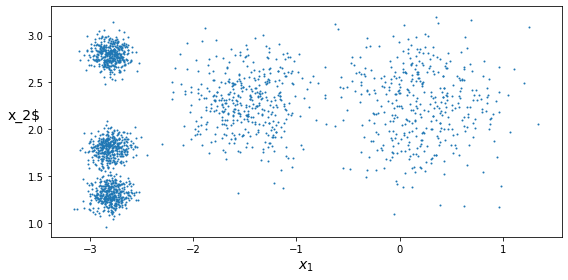

In [7]:
plt.figure(figsize=(8,4))
plot_clusters(x)
save_fig("blobs_plot")
plt.show()

## Fit and Predict
Traning a K-means cluster on the dataset will try to find each blob's center and assign each instance to the closest blob.

In [8]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x)

In [9]:
y_pred is kmeans.labels_

True

estimating the following 5 centroids (cluster centers)

In [10]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063]])

kmeans instance preserves the labels of the instances it was trained on.

In [11]:
kmeans.labels_

array([1, 2, 0, ..., 4, 0, 2])

predicting new instances

In [12]:
x_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(x_new)

array([0, 0, 4, 4])

## Decision Boundaries
Plotting the model's decision boundaries give us a _Voronoi diagram_.

In [13]:
def plot_data(x):
    plt.plot(x[:,0], x[:,1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
        
def plot_decision_boundaries(clusterer, x, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = x.min(axis=0) - 0.1
    maxs = x.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(x)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


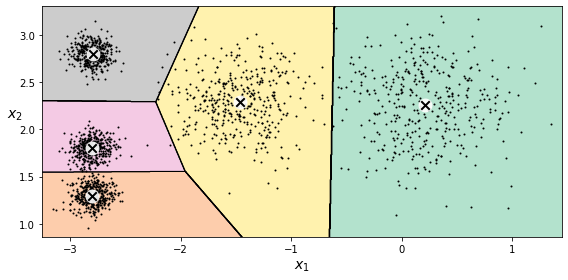

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, x)
save_fig("voronoi_plot")
plt.show()

 __Hard clustering__: assigning each instance to a single cluster (arbitarily choosing the closest cluster for each instace)
 <br>__Soft clustering__: assigning each instance a score per cluster (measuring the distance of each instance to all 5 centroids).
The code below is for soft clustering.

In [15]:
kmeans.transform(x_new)

array([[0.32995317, 2.88633901, 2.81093633, 1.49439034, 2.9042344 ],
       [2.80290755, 5.84236351, 5.80730058, 4.4759332 , 5.84739223],
       [3.29399768, 1.71086031, 1.21475352, 1.69136631, 0.29040966],
       [3.21806371, 1.21567622, 0.72581411, 1.54808703, 0.36159148]])

In this example, the first instance in x_new is located at a distance of 2.90 from the
first centroid, 0.32 from the second centroid, 2.81 from the third centroid, 1.49 from
the fourth centroid, and 2.88 from the fifth centroid.


Below, verifying that the this is indeed the Euclidian distance between each instance and each centroid.

In [16]:
np.linalg.norm(np.tile(x_new, (1,k)).reshape(-1,k,2) 
               - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.88633901, 2.81093633, 1.49439034, 2.9042344 ],
       [2.80290755, 5.84236351, 5.80730058, 4.4759332 , 5.84739223],
       [3.29399768, 1.71086031, 1.21475352, 1.69136631, 0.29040966],
       [3.21806371, 1.21567622, 0.72581411, 1.54808703, 0.36159148]])

## K-Means Algorithm
It is one of the fastest and simplest clustering algorithms.
 - First, initialize k centroids randomly: k distinct instances are choosen randomly from the dataset and the centroids are places at their locations.
 - Repeat until convergence(i.e centroids stop moving):
     - Assign each instance to the closest centroid
     - Update the centroids to be the mean of the instances that are assigned to them.

In [17]:
kmeans_iter1 = KMeans(n_clusters=5, init="random",
                      n_init=1, algorithm="full", 
                      max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random",
                      n_init=1, algorithm="full",
                     max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random",
                     n_init=1, algorithm="full",
                     max_iter=3, random_state=0)
kmeans_iter1.fit(x)
kmeans_iter2.fit(x)
kmeans_iter3.fit(x)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

Saving figure kmeans_algorithm_plot


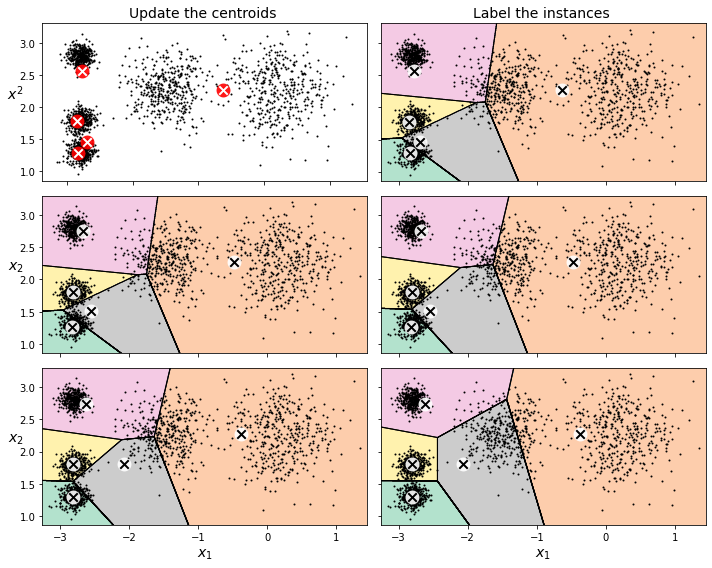

In [18]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(x)
plot_centroids(kmeans_iter1.cluster_centers_,
              circle_color='r', cross_color='w')
plt.ylabel("$x^2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids ", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, x, 
                        show_xlabels=False,
                        show_ylabels=False)
plt.title("Label the instances ", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, x, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, x, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, x, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, x, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

## K-Means Variability
In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as shown above.

However, one major problem with this approach is that if we run K-Means multiple times (or with different random seeds), it can converge to very differnet solutions, as shown below:

In [19]:
def plot_clusterer_comparision(clusterer1, clusterer2, x,
                            title1=None, title2=None):
    clusterer1.fit(x)
    clusterer2.fit(x)   
    
    plt.figure(figsize=(10,3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, x)
    if title1:
        plt.title(title1, fontsize=14)
        
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, x,
                            show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
        

Saving figure kmeans_variability_plot


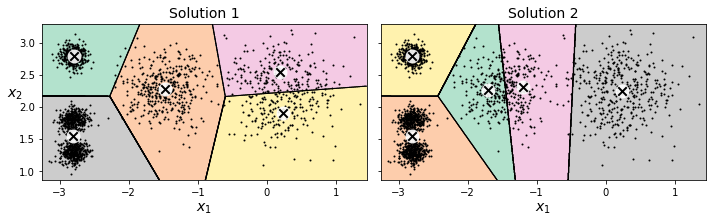

In [20]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random",
                         n_init=1, algorithm="full",
                         random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random",
                         n_init=1, algorithm="full",
                         random_state=5)
plot_clusterer_comparision(kmeans_rnd_init1, 
                          kmeans_rnd_init2, x,
                          "Solution 1", "Solution 2")
save_fig("kmeans_variability_plot")
plt.show()

### Inertia
__Inertia metric__: measuring the distance between each instance and its centroid in order to evaluate the kmeans model's performance.

In [21]:
kmeans.inertia_

211.59853725816828

Also, inertia is the sum of squared distances between each training instance and its closest centroid.

In [22]:
x_dist = kmeans.transform(x)
np.sum(x_dist[np.arange(len(x_dist)), kmeans.labels_]**2)

211.59853725816862

score() method returns the negative inertia because a predictor's score() method must always respect the "greater is better" rule (if a predictor is better than another, its score() method should return a greater score).

In [23]:
kmeans.score(x)

-211.59853725816836

### K-Means++
Instead od initializing the centroids entirely random, it is preferable to initialize them using the following algorithm:
 - Take one centroid $c_1$, chosen uniformly at random from the dataset.
 - Take a new center $c_i$, choosing an instance $x^i$ with probability: $D(x^i)^2 / \sum\limits_{j=1}^{m}D(x^j)^2$, where $D(x_i)$ is the distance between the instance ${x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
 - Repeat the previous step until all $k$ centroids have been chosen.

In [24]:
KMeans()

KMeans()

In [25]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(x)
kmeans.inertia_

211.62337889822365

### Accelerated K-Means
The K-Means algorithm can be significantly accelerated bu avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids.

Note: Scikit-Learn uses "elkan" for dense data (Elkan's cariant of kmeans) and "full" for sparse data (the regular K-Means algorithm).

In [26]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(x)

226 ms ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [27]:
%timeit -n 50 KMeans(algorithm="full",random_state=42).fit(x)

1.17 s ± 66.4 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-Batch K-Means
Instead of using full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory.

In [28]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5,
                                  random_state=42).fit(x)


In [29]:
minibatch_kmeans.inertia_

211.93186531476786

If the dataset doesnot fit in memory, the simplest option is to use memmap class.

In [30]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    mnist["data"],mnist["target"], random_state=42)

Now, let's write it to a memmap:

In [32]:
filename = "my_mnist.data"
x_mm = np.memmap(filename, dtype='float32', mode='write',
                shape = x_train.shape)
x_mm[:]=x_train

In [33]:
mninibatch_kmeans = MiniBatchKMeans(n_clusters=10,
                                   batch_size=10,
                                   random_state=42)
minibatch_kmeans.fit(x_mm)

MiniBatchKMeans(n_clusters=5, random_state=42)

If our data is so large that we cannot use memmap, things get more complicated. Starting by writing a function to load the next batch.

In [34]:
def load_next_batch(batch_size):
    return x[np.random.choice(len(x), batch_size,
                             replace=False)]

Now we can train the model by feeding it one batch at a time. We also need to implement multiple initializations and keep the model with the lowest inertia.

In [35]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [36]:
best_kmeans.score(x)

-211.6827648660383

Minibatch kmeans is much faster than regular kmeans

In [37]:
%timeit KMeans(n_clusters=5, random_state=42).fit(x)

137 ms ± 3.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(x)

50.5 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Althought minibatch kmeans is faster, it's performance is often lower (higher inertia) and it keeps degrading as k increases.

Plotting inertia ratio and the training time ratio between minibatch kmeans and regular kmeans.

In [39]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, 
                                       random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(x)", number=10, 
                           globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(x)", 
                            number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

Saving figure minibatch_kmeans_vs_kmeans


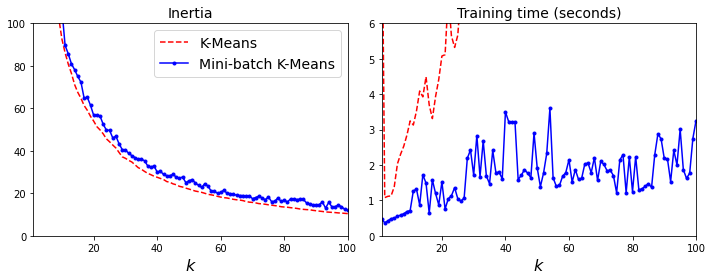

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

### Finding the optimal number of clusters
What if the number of clusters was set to a lower or greater value than 5?

Saving figure bad_n_clusters_plot


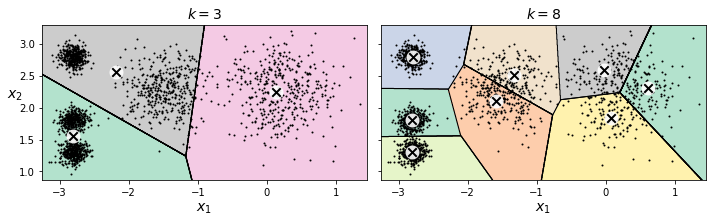

In [41]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparision(kmeans_k3, kmeans_k8, x,
                          "$k=3$","$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

These models dont look great.

In [42]:
kmeans_k3.inertia_

653.2223267580945

In [43]:
kmeans_k8.inertia_

118.44108623570087

We cannot simply take the value of k that minimizes the inertia since it keeps getting lower as we increase k. Indeed, the more the clusters, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of k and analyze the resulting curve:

In [44]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


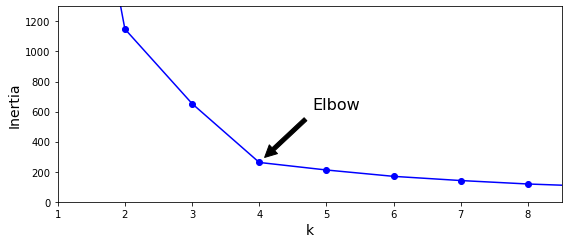

In [45]:
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow', 
            xy=(4,inertias[3]),
            xytext=(0.55,0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops=dict(facecolor='black',shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Now, we can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice.

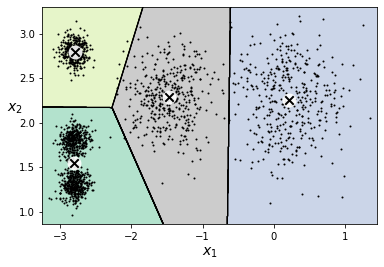

In [46]:
plot_decision_boundaries(kmeans_per_k[4-1], x)
plt.show()

Another approach is to look at the _slihouette score_, which is the mean silhoutte coefficient over all the instances. An instance's silhouette coefficeint is equal to (b-a)/max(a,b) where a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance) and b is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes b, excluding the instance's own cluster).

The silhouette coefficient can vary between -1 to +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Plotting the silhouette score as a function of $k$:

In [47]:
from sklearn.metrics import silhouette_score

silhouette_score(x, kmeans.labels_)

0.655517642572828

In [48]:
silhouette_score = [silhouette_score(x, model.labels_)
                   for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


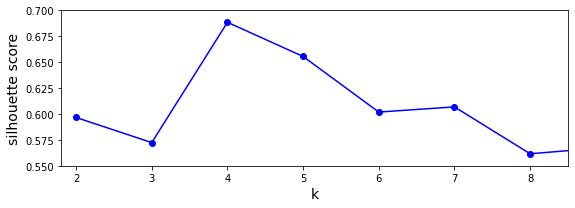

In [49]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10),silhouette_score, "bo-")
plt.xlabel("k",fontsize=14)
plt.ylabel("silhouette score",fontsize=14)
plt.axis([1.8,8.5,0.55,0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

The above visualization is much richer than the previous one: it confirms that k=4 is a very good choice, but it also underlines the fact that k=5 is quite good as well.

__silhouette diagram__: An even more informative visualization is given when we plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient.

Saving figure silhouette_analysis_plot


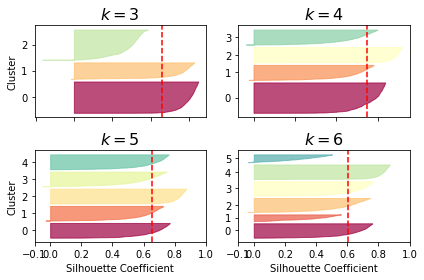

In [50]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as mpl

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x, y_pred)

    padding = len(x) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

Here, k=5 seems the best option, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

### Limits of K-Means
- It is necessary to run the algorithm several times to avoid suboptimal solution.
- we need to specify no. of clusters.
- It does not behave very well when the clusters have varying sizes, different densities or nonspherical shapes.

In [51]:
x1, y1 = make_blobs(n_samples=1000, centers=((4,-4),
                    (0,0)), random_state=42)
x1 = x1.dot(np.array([[0.374,0.95], [0.732,0.598]]))
x2,y2 = make_blobs(n_samples=250, centers=1, random_state=42)
x2 = x2 + [6,-8]
x = np.r_[x1,x2]
y = np.r_[y1,y2]

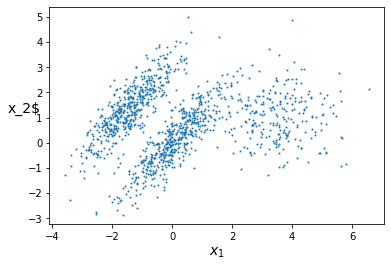

In [52]:
plot_clusters(x)

In [53]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], 
                                                  [0.5, 0], [4, 0]]),
                    n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(x)
kmeans_bad.fit(x)

KMeans(n_clusters=3, random_state=42)

Saving figure bad_kmeans_plot


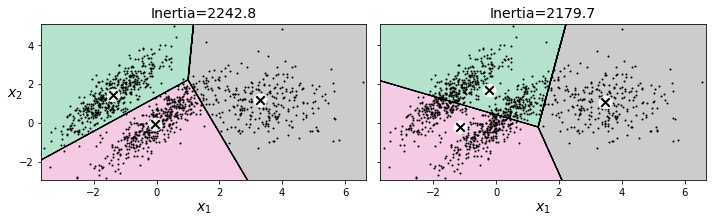

In [54]:
plt.figure(figsize=(10,3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good,x)
plt.title("Inertia={:.1f}".format(kmeans_good.inertia_),
         fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad,x, show_ylabels=False)
plt.title("Inertia={:.1f}".format(kmeans_bad.inertia_),
         fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

Above, it is a dataset containing three ellipsoidal clusters of different dimensions, densities an orientations.

On the left side, 25% of the middle cluster is choped off and assigned to the cluster on the right. The right side solution is also not good although the inertia is low.

### Using clustering for image segmentation
_Image segmentation_ is the task of partitioning an image into multiple segments.
Here, we are going to do _color segmentation_. We will assign pixels to the same segment if they have a similar color.

In [55]:
# Downloading ladybug image

images_path = os.path.join(PROJECT_ROOT_DIR, "images",
                          "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading",filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path,
                                            filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x18fab3de490>)

In [56]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [57]:
x = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=41).fit(x)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [58]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(x)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram


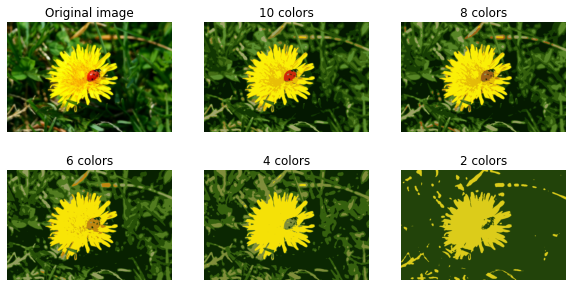

In [59]:
plt.figure(figsize=(10,5))

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

Here, when there are less than 8 no of clusters, ladybug's flashy red color fails to get a cluster of its own: it merged with colors from the environment. This is because K-Means prefers clusters of similar sizes. The ladybug is much smaller than the rest of the image, so even though its color is flashy, K-Means fails to dedicate a cluster to it.

### Using clustering for Preprocessing
Tackling the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8x8 images
representing 0 to 9.

In [60]:
from sklearn.datasets import load_digits 

x_digits, y_digits = load_digits(return_X_y=True)

Splitting it into a training set and test set:


In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_digits, y_digits, random_state=42)

Fitting a Logistic Regression model and evaluating it on the test set:

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
log_reg = LogisticRegression(multi_class="ovr", 
                             solver="lbfgs",max_iter=500,
                            random_state=42)
log_reg.fit(x_train, y_train)

D:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression(max_iter=500, multi_class='ovr', random_state=42)

In [64]:
log_reg_score = log_reg.score(x_test, y_test)
log_reg_score

0.9688888888888889

It's 96.8% accuracy. Let's see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then applying a logistic regression model:

In [65]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr",
                                  solver="lbfgs",
                                  max_iter=5000,
                                  random_state=42))
])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [66]:
pipeline_score = pipeline.score(x_test, y_test)
pipeline_score

0.98

In [67]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.3571428571428561

Here, the error rate is dropped bu over 35%.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(x_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 24.0min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [70]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [71]:
grid_clf.score(x_test, y_test)

0.98

With k = 98 clusters, we get a significant accuract boost, reaching 98% accuracy.

### Using clustering for semi-supervised learning
Clustering is used when we have plenty of unlabeled instances and very few labeled instances.

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [72]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", 
                            solver="lbfgs",
                            random_state=42)
log_reg.fit(x_train[:n_labeled], y_train[:n_labeled])
log_reg.score(x_test,y_test)

0.8333333333333334

It's much less than earlier. Let's see how we can do it better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [73]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
x_digits_dist = kmeans.fit_transform(x_train)
representative_digit_idx = np.argmin(x_digits_dist, axis=0)
x_representative_digits = x_train[representative_digit_idx]

Now, plotting representative images and labelling them manually:

Saving figure representative_images_diagram


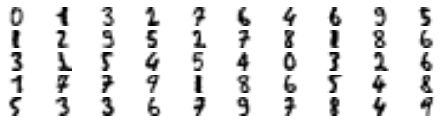

In [74]:
plt.figure(figsize=(8, 2))
for index, x_representative_digit in enumerate(x_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(x_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [75]:
y_train[representative_digit_idx]

array([0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 3, 1,
       5, 4, 5, 4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6,
       7, 9, 7, 8, 4, 9])

In [76]:
y_representative_digits = np.array([
    0,1,3,2,7,6,4,6,9,5,
    1,2,9,5,2,7,8,1,8,6,
    3,2,5,4,5,4,0,3,2,6,
    1,7,7,9,1,8,6,5,4,8,
    5,3,3,6,7,9,7,8,4,9
])

Now, we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [77]:
log_reg = LogisticRegression(multi_class="ovr",
                            solver="lbfgs",max_iter=5000,
                            random_state=42)
log_reg.fit(x_representative_digits, y_representative_digits)
log_reg.score(x_test, y_test)

0.9133333333333333

We jumped from 83.3% accuracy to 91.3%, although we are still only training the model on 50 instances.

We can go one step further if we propagated the labels to all the other instances in the same cluster.

In [78]:
y_train_propagated = np.empty(len(x_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [79]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [80]:
log_reg.score(x_test, y_test)

0.9244444444444444

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 75th percentile closest to the centroid:

In [81]:
percentile_closest = 75

x_cluster_dist = x_digits_dist[np.arange(len(x_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = x_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (x_cluster_dist > cutoff_distance)
    x_cluster_dist[in_cluster & above_cutoff] = -1

In [82]:
partially_propagated = (x_cluster_dist != -1)
x_train_partially_propagated = x_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [83]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [84]:
log_reg.score(x_test, y_test)

0.9266666666666666

A bit better. With just 50 labeled instances (just 5 examples per class on average!), we got 92.7% performance, which is getting closer to the performance of logistic regression on the fully labeled digits dataset

In [85]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9592039800995025

### Active Learning
- The model is trained on labeled instances and this model is used to make predictions on all unlabeles instances.
- The instances with the lowest probability (uncertain) is given to the expert to be labeled.
- Manually label the instances that classifier is least sure about, if possible by picking them in distinct clusters.
- Train a new model with these additional labels.

# DBSCAN
_Density Based Spatial Clustering of Applications with Noise_<br>

__epsilon ($\epsilon$)__: like radius<br>
__$\epsilon$-neighborhood__: For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ from it. This region is called the instance's $\epsilon$-neighborhood.<br>
__core point__: If an isntance has  at least min_samples (for eg.min_point=3) instances in its $\epsilon$-neighborhood, then it is considered a core point. They are located in dense region.<br> All instances in the neighborhood of a core instance belong to the same cluster which may alos include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.<br>
__boundary point__: Any instance that is not a core instance and doesnot satisfy the condition of min_samples.<br>
__noise point (anomaly/outliers)__: Any instance that is neither core nor boundary point. It doesnot belong to the cluster. DBSCAN is robust to outliers.

This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions.

In [86]:
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=1000,noise=0.05, random_state=42)

In [87]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.05)

In [88]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

Some index have cluster index equal to -1 means they are considered as anamolies by the algorithm.

In [89]:
len(dbscan.core_sample_indices_)

808

In [90]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [91]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [92]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [93]:
dbscan2 = DBSCAN(eps=0.2)
dbscan.fit(x)

DBSCAN(eps=0.05)

__code error__

def plot_dbscan(dbscan, x, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = x[anomalies_mask]
    non_cores = x[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

__code error__

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, x, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, x, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

In [94]:
dbscan = dbscan2

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[
    dbscan.core_sample_indices_
])

x_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(x_new)

knn.predict_proba(x_new)

plt.figure(figsize=(6,3))
plot_decision_boundaries(knn, x, show_centroids=False)
plt.scatter(x_new[:,0m],x_new[:,1],c="b",marker="+",s=200,
           zorder=10)
save_fig("cluster_classification_plot")
plt.show()

y_dist, y_pred_idx = knn.kneighbors(x_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_]
[y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

### Other Clustering Algorithms

## Spectral Clustering

In [95]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100,
                        random_state=42)
sc1.fit(x)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [96]:
sc2 = SpectralClustering(n_clusters=2, gamma=1,
                        random_state=42)
sc2.fit(x)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [97]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [98]:
def plot_spectral_clustering(sc, x, size, alpha, 
                            show_xlabels=True,
                            show_ylabels=True):
    plt.scatter(x[:,0], x[:,1], marker='o',s=size,c='gray',
               cmap='Paired',alpha=alpha)
    plt.scatter(x[:,0], x[:,1], marker='o',s=30,c='w')
    plt.scatter(x[:,0], x[:,1], marker='.',s=10,
                c=sc.labels_, cmap='Paired')
    
    if show_xlabels:
        plt.xlabel("$x_1$",fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$",fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)
        

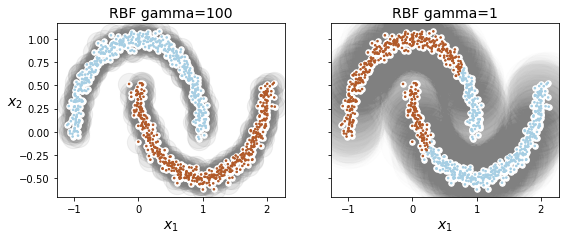

In [99]:
plt.figure(figsize=(9,3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, x, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, x, size=4000, alpha=0.01,
                        show_ylabels=False)

plt.show()

## Agglomerative Clustering
A hierarchy of clusters is built from the bottom up. At each iteration, agglomerative clustering connects the
nearest pair of clusters (starting with individual instances).

In [100]:
from sklearn.cluster import AgglomerativeClustering

In [101]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(x)

In [102]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not 
            attrib.startswith("_")]

In [103]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [104]:
agg.children_

array([[ 427,  675],
       [ 557,  782],
       [ 126,  597],
       ...,
       [1990, 1994],
       [1986, 1995],
       [1996, 1997]])

# Gaussian Mixtures Model (GMM)
It is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown

In [105]:
x1, y1 = make_blobs(n_samples=1000, centers=((4,-4),
                            (0,0)), random_state=42)
x1  = x1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
x2,y2 = make_blobs(n_samples=250, centers=1,
                  random_state=42)
x2 = x2 + [6,-8]
x = np.r_[x1,x2]
y = np.r_[y1,y2]

Training a Gaussian Mixture model on the previous dataset:

In [106]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, 
                    random_state=42)
gm.fit(x)

GaussianMixture(n_components=3, n_init=10, random_state=42)


The parameters that the EM (Expectation-Maximization)  algorithm estimated:

In [107]:
gm.weights_

array([0.39054348, 0.2093669 , 0.40008962])

In [108]:
gm.means_

array([[ 0.05224874,  0.07631976],
       [ 3.40196611,  1.05838748],
       [-1.40754214,  1.42716873]])

In [109]:
gm.covariances_

array([[[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]],

       [[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]]])

In [110]:
gm.converged_

True

In [111]:
gm.n_iter_

4

Now, we can use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, predict() method or predict_proba() method is used.

In [112]:
gm.predict(x)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [113]:
gm.predict_proba(x)

array([[9.77227791e-01, 2.27715290e-02, 6.79898914e-07],
       [9.83288385e-01, 1.60345103e-02, 6.77104389e-04],
       [7.51824662e-05, 1.90251273e-06, 9.99922915e-01],
       ...,
       [4.35053542e-07, 9.99999565e-01, 2.17938894e-26],
       [5.27837047e-16, 1.00000000e+00, 1.50679490e-41],
       [2.32355608e-15, 1.00000000e+00, 8.21915701e-41]])

This is a generative model, so we can sample new instances from it and get their labels.

In [114]:
x_new, y_new = gm.sample(6)
x_new

array([[-0.8690223 , -0.32680051],
       [ 0.29945755,  0.2841852 ],
       [ 1.85027284,  2.06556913],
       [ 3.98260019,  1.50041446],
       [ 3.82006355,  0.53143606],
       [-1.04015332,  0.7864941 ]])

In [115]:
y_new

array([0, 0, 1, 1, 1, 2])

They are sampled sequentially from each cluster.

Now, estimating log of the PDF at any location using score_samples() method.

In [116]:
gm.score_samples(x)

array([-2.60674489, -3.57074133, -3.33007348, ..., -3.51379355,
       -4.39643283, -3.8055665 ])

Checking if the PDF integrates to 1 over the whole space. For this: 
- Taking a large square around the clusters
- Choppin it into a grid of tiny squares
- Then, computing the approximate probability that the instances will be generated in each tiny square (by multiplying PDF at one corner of tiny square by the area of the square and finally summing all the probabilities).
The result is very close to 1.

In [117]:
resolution = 100
grid = np.arange(-10,10,1 / resolution)
xx,yy = np.meshgrid(grid, grid)
x_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(x_full))
pdf_probas = pdf * (1/resolution) ** 2
pdf_probas.sum()

0.9999999999271592

Plotting the resulting decision boundaries (dashed lines) and density contours:

In [118]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, x, resolution=1000,
                         show_ylabels=True):
    mins = x.min(axis=0) - 0.1
    maxs = x.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


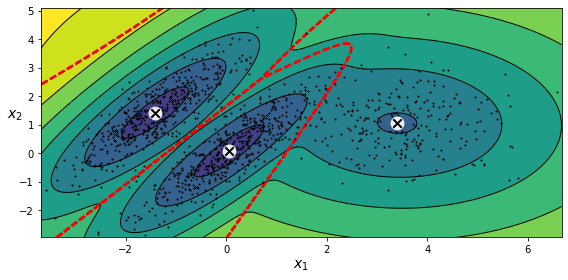

In [119]:
plt.figure(figsize=(8,4))

plot_gaussian_mixture(gm,x)

save_fig("gaussian_mixtures_plot")
plt.show()

Constraints can be imposed on the covariance matrices that the algorithm looks for by setting the covariance_type hyperparameter:
- __full (default)__: no constraint, all clusters can take on any ellipsoidal shape of any size.
- __tied__: all clusters must have the same shape, which can by any ellipsoid (i.e they all share shme covariance matrix).
- __spherical__: all clusters must be spherical, but they can have different diameters (i.e different variances).
- __diag__: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e the covariance matrices must be diagonal).

In [120]:
gm_full = GaussianMixture(n_components=3, n_init=10,
            covariance_type="full", random_state=42)

gm_tied = GaussianMixture(n_components=3, n_init=10,
            covariance_type="tied", random_state=42)

gm_spherical = GaussianMixture(n_components=3, n_init=10,
            covariance_type="spherical", random_state=42)

gm_diag = GaussianMixture(n_components=3, n_init=10,
            covariance_type="diag", random_state=42)

gm_full.fit(x)
gm_tied.fit(x)
gm_spherical.fit(x)
gm_diag.fit(x)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [121]:
def compare_gaussian_mixture(gm1, gm2, x):
    plt.figure(figsize=(9,4))
    
    plt.subplot(121)
    plot_gaussian_mixture(gm1,x)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type),
              fontsize=14)
    
    plt.subplot(122)
    plot_gaussian_mixture(gm2,x,show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type),
              fontsize=14)
    

Saving figure covariance_type_plot


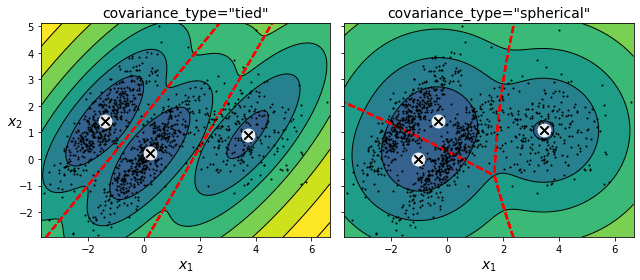

In [122]:
compare_gaussian_mixture(gm_tied, gm_spherical, x)

save_fig("covariance_type_plot")
plt.show()

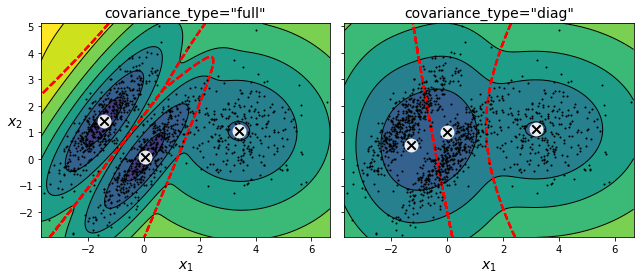

In [123]:
compare_gaussian_mixture(gm_full, gm_diag, x)
plt.tight_layout()
plt.show()

### Anomaly Detection using Gaussian Mixtures
It is the task of detecting instances that deviate strongly from the norm.

Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies. We must define what density threshold we want to use. If we get too many false negatives (i.e defective products that the system does not flag as defective), we can increase the threshold. This is the usual precision/recall trade-off.

In [124]:
densities = gm.score_samples(x)
density_threshold = np.percentile(densities, 4)
anomalies = x[densities < density_threshold]

Saving figure mixture_anomaly_detection_plot


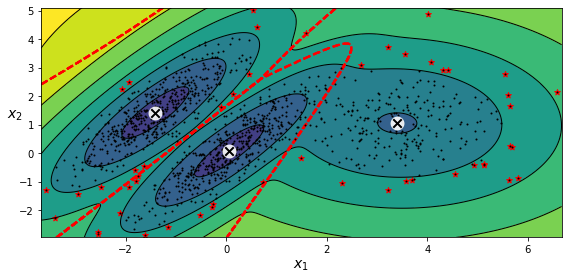

In [125]:
plt.figure(figsize=(8,4))

plot_gaussian_mixture(gm,x)
plt.scatter(anomalies[:,0], anomalies[:,1],
           color='r', marker="*")
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

__novelty detection__: closely related task to anomaly detection. In this, the algorithm is assumed to be trained on a _clean_ dataset, uncontaminated by outliers whereas, in anomaly detection, it does not make this assumption instead it is used to clean up a dataset.

### Model selection (selecting no of clusters)
We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):


$BIC = log(m)p - 2log(\hat L)$

$AIC = 2p - 2log(\hat L)$

- m: no of instances
- p: no of parameters learned by the model
- $\hat L$: maximized value of likelihood function of the model This is the conditional probability of the observed data $X$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [126]:
gm.bic(x)

8189.662685850679

In [127]:
gm.aic(x)

8102.437405735641

Computing BIC and AIC manually:

In [128]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims+1)//2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(x) * len(x) #log(L^)
bic = np.log(len(x)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [129]:
bic, aic

(8189.662685850679, 8102.437405735641)

In [130]:
n_params

17

There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but
$1 + 2 +...+ n = \frac{n(n+1)}{2}$

Training Gaussian Mixture models with various values of $k$ and measuring their BIC:

In [131]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10,
                            random_state=42).fit(x)
             for k in range(1,11)]

In [132]:
bics = [model.bic(x) for model in gms_per_k]
aics = [model.aic(x) for model in gms_per_k]

Saving figure aic_bic_vs_k_plpt


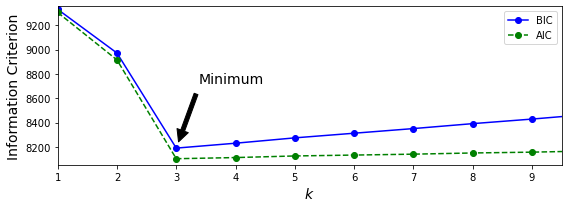

In [133]:
plt.figure(figsize=(8,3))
plt.plot(range(1,11), bics, "bo-", label="BIC")
plt.plot(range(1,11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])

plt.annotate('Minimum',
            xy = (3, bics[2]),
            xytext = (0.35,0.6),
            textcoords = 'figure fraction',
            fontsize = 14,
            arrowprops = dict(facecolor='black',
                             shrink=0.1))
plt.legend()
save_fig("aic_bic_vs_k_plpt")
plt.show()

Searching for best combination of values for both the number of clusters and the covariance_type hyperparameter:

In [134]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical",
                            "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                    covariance_type=covariance_type,
                    random_state=42).fit(x).bic(x)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [135]:
best_k

3

In [136]:
best_covariance_type

'full'

## Bayesian Gaussian Mixture Models
Rather than manually searching for the optimal number of clusters, it is possible to use instead the _BayesianGaussianMixture_ class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10,
                             random_state=42)
bgm.fit(x)

In [ ]:
np.round(bgm.weights_, 2)

In [ ]:
plt.figure(figsize=(8,5))
plot_gaussian_mixture(bgm, x)
plt.show(
)

In [ ]:
bgm_low = BayesianGaussianMixture(n_components, max_iter=1000,
                                 n_init=1,
                                 weight_concentration_prior=0.01,
                                 random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10,
                                  max_iter=1000,
                                  n_init=1,
                                  weight_concentration_prior=10000,
                                  random_state=42)
nn = 73
bgm_low.fit(x[:nn])
bgm_high.fit(x[:nn])

In [ ]:
np.round(bgm_low.weights_,2)

In [ ]:
np.round(bgm_high.weights_,2)

In [ ]:
plt.figure(figsize=(9,4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, x[:nn])
plt.title("weight_concentration_prior=0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, x[:nn], show_ylabels=False)
plt.title("weight_concentration_prior=10000", fontsize=14)

save_fig("mixture_concentration_prior_plot")
plt.show()